In [1]:
import numpy as np
from DumbTruck import DumbTruck
from kalmanfilter import KalmanFilter

In [14]:
#Set up the data generation
t = 100
dt = 1
k = 0.1
ep = 0.01
nu = 0.01

gen = DumbTruck()
initial = np.array([[1],[1]])
process = gen.process(initial, t=t, dt=dt, k=k, ep=ep)
measure = gen.measure(process, nu=nu)

In [15]:
#Inspect our outputs to make sure they are correct
process

array([[ 1.00000000e+00,  2.00000000e+00,  2.88275472e+00,
         3.69826822e+00,  4.43539456e+00,  5.10656904e+00,
         5.71745987e+00,  6.24776805e+00,  6.72727914e+00,
         7.15914875e+00,  7.55026382e+00,  7.89689118e+00,
         8.20113931e+00,  8.47650410e+00,  8.72248866e+00,
         8.94289734e+00,  9.14893936e+00,  9.32583392e+00,
         9.50336024e+00,  9.67676703e+00,  9.84959024e+00,
         1.00071458e+01,  1.01465886e+01,  1.02707037e+01,
         1.03751561e+01,  1.04697227e+01,  1.05415933e+01,
         1.06140701e+01,  1.06868591e+01,  1.07452148e+01,
         1.08035066e+01,  1.08632723e+01,  1.09101648e+01,
         1.09476211e+01,  1.09692206e+01,  1.10043160e+01,
         1.10510029e+01,  1.11072552e+01,  1.11692982e+01,
         1.12282169e+01,  1.12817699e+01,  1.13337450e+01,
         1.13669812e+01,  1.14034588e+01,  1.14367657e+01,
         1.14680016e+01,  1.14979306e+01,  1.15124604e+01,
         1.15343168e+01,  1.15564966e+01,  1.15697231e+0

In [16]:
measure

array([[ 1.01099565e+00,  1.98995399e+00,  2.87890898e+00,
         3.69872459e+00,  4.43268253e+00,  5.10625048e+00,
         5.72096693e+00,  6.25238203e+00,  6.71707246e+00,
         7.15400765e+00,  7.58017080e+00,  7.90541006e+00,
         8.19157470e+00,  8.47692305e+00,  8.73825245e+00,
         8.95112680e+00,  9.15372705e+00,  9.32039059e+00,
         9.48813509e+00,  9.66743448e+00,  9.85695370e+00,
         1.00068027e+01,  1.01472098e+01,  1.02785081e+01,
         1.03761118e+01,  1.04740497e+01,  1.05713316e+01,
         1.06145781e+01,  1.06885887e+01,  1.07494665e+01,
         1.07981822e+01,  1.08663358e+01,  1.09023517e+01,
         1.09393785e+01,  1.09572098e+01,  1.10035106e+01,
         1.10596341e+01,  1.11109188e+01,  1.11744456e+01,
         1.12529956e+01,  1.12745078e+01,  1.13386717e+01,
         1.13935664e+01,  1.14125751e+01,  1.14419464e+01,
         1.14725908e+01,  1.14939258e+01,  1.15080981e+01,
         1.15321851e+01,  1.15546145e+01,  1.15814243e+0

Text(0, 0.5, 'Position')

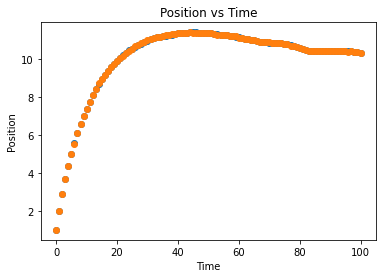

In [19]:
plt.scatter(np.arange(0, (t + 1) * dt, dt), process[0])
plt.scatter(np.arange(0, (t + 1) * dt, dt), measure[0])
plt.title("Position vs Time")
plt.xlabel("Time")
plt.ylabel("Position")

Text(0, 0.5, 'Velocity')

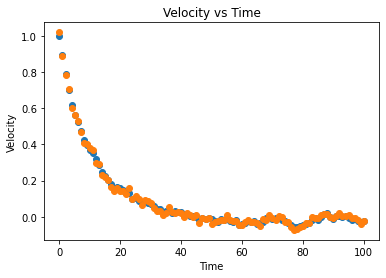

In [20]:
plt.scatter(np.arange(0, (t + 1) * dt, dt), process[1])
plt.scatter(np.arange(0, (t + 1) * dt, dt), measure[1])
plt.title("Velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")

In [21]:
output = np.array([[], []])
filter = KalmanFilter(initial, dt, k, ep, nu, nu)
for i in range(t+1):
    measure_t = measure[:,i]
    measure_t.shape = (2,1)
    filter.predict(measure_t)
    kalman_output = filter.get_current_guess()
    output = np.append(output, kalman_output, axis=1)

In [22]:
measure.shape

(2, 101)

Text(0, 0.5, 'Position')

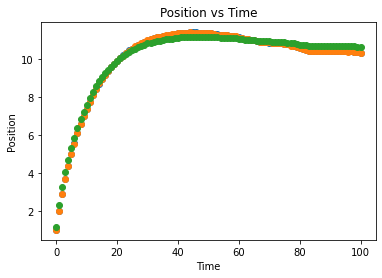

In [24]:
plt.scatter(np.arange(0, (t + 1) * dt,dt), process[0])
plt.scatter(np.arange(0, (t + 1) * dt, dt), measure[0])
plt.scatter(np.arange(0, (t + 1) * dt, dt), output[0])
plt.title("Position vs Time")
plt.xlabel("Time")
plt.ylabel("Position")

Text(0, 0.5, 'Velocity')

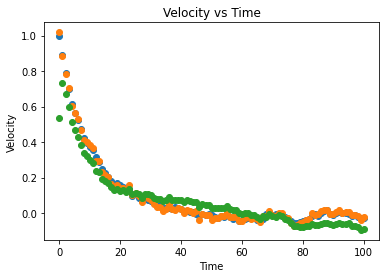

In [26]:
plt.scatter(np.arange(0, (t + 1) * dt, dt), process[1])
plt.scatter(np.arange(0, (t + 1) * dt, dt), measure[1])
plt.scatter(np.arange(0, (t + 1) * dt, dt), output[1])
plt.title("Velocity vs Time")
plt.xlabel("Time")
plt.ylabel("Velocity")

In [13]:
output

array([[1.00162954, 1.03477978, 1.05001891, 1.07872924, 1.09171725,
        1.11815684, 1.13798666, 1.15722642, 1.17395519, 1.19594486,
        1.21584266, 1.23569911, 1.25586628, 1.27423854, 1.29429202,
        1.31337075, 1.3342925 , 1.35293337, 1.37287004, 1.39123036,
        1.41096674, 1.42950736, 1.44924124, 1.46870001, 1.48810503,
        1.50655759, 1.52563705, 1.54453062, 1.56289375, 1.58258586,
        1.60143771, 1.61992625, 1.63894221, 1.65766315, 1.67580371,
        1.69454036, 1.71330743, 1.73200818, 1.75079742, 1.76954416,
        1.78774152, 1.80618841, 1.82449759, 1.84224964, 1.86110716,
        1.87904712, 1.89778754, 1.91534819, 1.93389415, 1.95174565,
        1.96989338, 1.98818684, 2.00592514, 2.02426305, 2.04236777,
        2.06035545, 2.07824263, 2.09592899, 2.11343274, 2.13147635,
        2.14904339, 2.16693216, 2.18460913, 2.20197067, 2.21997197,
        2.23756155, 2.25489825, 2.27190832, 2.29027807, 2.30741781,
        2.32451625, 2.34201302, 2.3596408 , 2.37